# Test Daily dataset using ARIMA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

## Reading Data

In [ ]:
#gold price data
data = pd.read_excel ("Daily.xlsx")

# Ensure the date column is parsed correctly
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Extract the close price as the time series
time_series = data['Close']

In [5]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(time_series)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] > 0.05:
    print("The time series is non-stationary. Apply differencing.")
else:
    print("The time series is stationary.")


ADF Statistic: 0.5059106106737842
p-value: 0.9850516416913053
The time series is non-stationary. Apply differencing.


In [6]:
time_series_diff = time_series.diff().dropna()

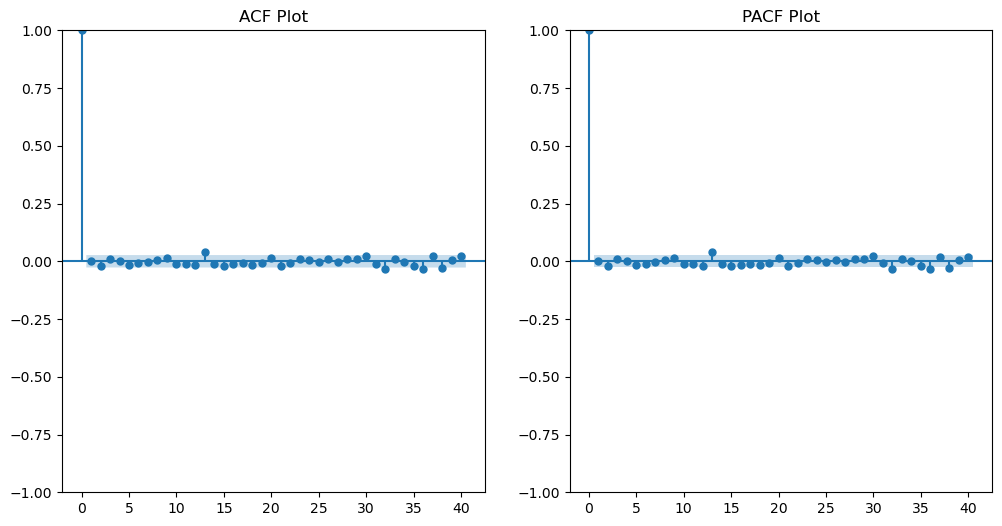

In [7]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(time_series_diff, ax=plt.gca(), lags=40)
plt.title("ACF Plot")

plt.subplot(122)
plot_pacf(time_series_diff, ax=plt.gca(), lags=40)
plt.title("PACF Plot")

plt.show()

In [20]:
# Define the split ratio (e.g., 80% for training)
train_size = int(len(time_series) * 0.8)

# Split the data
train = time_series[:train_size]  # First 80% for training
test = time_series[train_size:]  # Remaining 20% for testing

In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model parameters (p, d, q)
p, d, q = 1, 1, 2  # Example values; replace with your chosen parameters

# Train the model on the training set
arima_model = ARIMA(train, order=(p, d, q)).fit()

# Print summary
print(arima_model.summary())

D:\Software\Anacoda\Setup\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Software\Anacoda\Setup\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Software\Anacoda\Setup\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Software\Anacoda\Setup\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4260
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -17020.339
Date:                Sat, 05 Apr 2025   AIC                          34048.679
Time:                        12:29:02   BIC                          34074.106
Sample:                             0   HQIC                         34057.664
                               - 4260                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0068      4.189      0.002      0.999      -8.204       8.217
ma.L1          0.0043      4.189      0.001      0.999      -8.206       8.214
ma.L2         -0.0026      0.047     -0.055      0.9

In [23]:
# Forecast the next 30 days
# Forecast the same number of steps as the test set
forecast_steps = len(test)
predictions = arima_model.forecast(steps=forecast_steps)


D:\Software\Anacoda\Setup\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


RMSE: 132315.0207520396


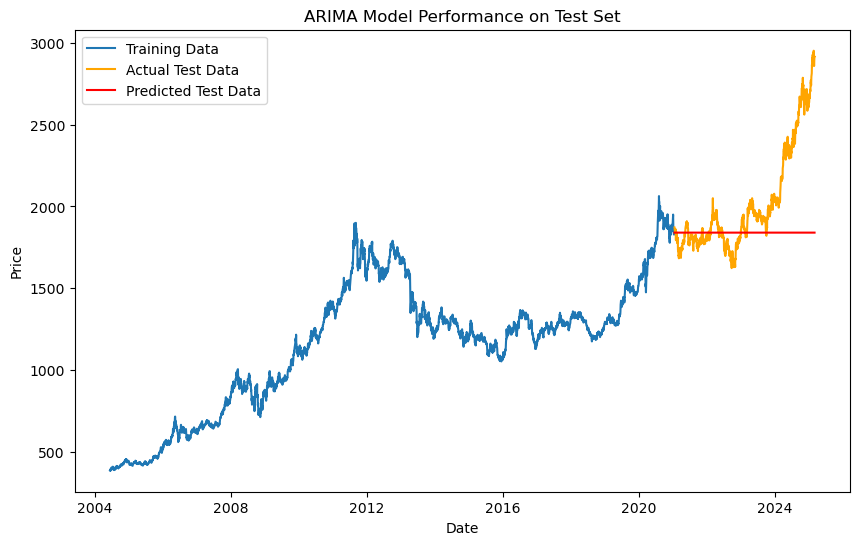

In [25]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = mean_squared_error(test, predictions)
print(f"RMSE: {rmse}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train, label="Training Data")
plt.plot(test, label="Actual Test Data", color='orange')
plt.plot(test.index, predictions, label="Predicted Test Data", color='red')
plt.title("ARIMA Model Performance on Test Set")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()